## Data Science & Business Analytics Internship at GRIP - The Sparks Foundation

### Linear Regression with Python Scikit Learn - Prediction using Supervised ML

#### Task-1 : Predict the percentage of an student based on the number of study hours.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
### SHIVAM SINGH

### Importing the libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import style

### Reading the data 

In [2]:
Data = "http://bit.ly/w-data"
df = pd.read_csv(Data)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.shape

(25, 2)

In [5]:
df.size

50

In [6]:
# cheking for missing value 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Data Visualization 

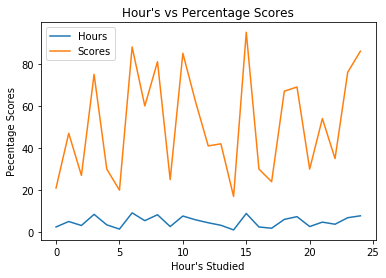

In [9]:
df.plot(kind = 'line')
plt.title("Hour's vs Percentage Scores")
plt.xlabel("Hour's Studied")
plt.ylabel("Pecentage Scores")
plt.show()

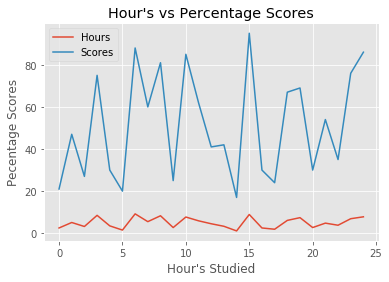

In [10]:
style.use('ggplot')
df.plot(kind = 'line')
plt.title("Hour's vs Percentage Scores")
plt.xlabel("Hour's Studied")
plt.ylabel("Pecentage Scores")
plt.show()

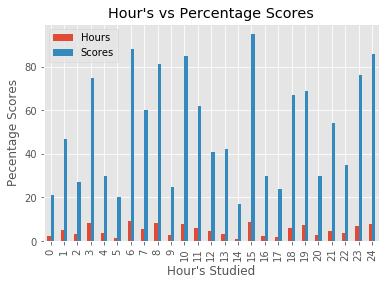

In [11]:
df.plot(kind = 'bar')
plt.title("Hour's vs Percentage Scores")
plt.xlabel("Hour's Studied")
plt.ylabel("Pecentage Scores")
plt.show()

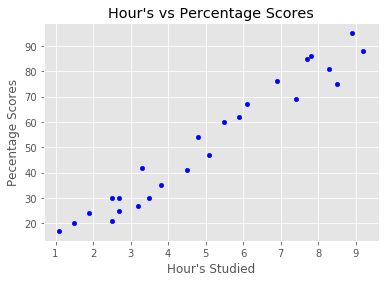

In [12]:
df.plot(kind = 'scatter',x = 'Hours', y = 'Scores',c = 'b')
plt.title("Hour's vs Percentage Scores")
plt.xlabel("Hour's Studied")
plt.ylabel("Pecentage Scores")
plt.show()

###### By using scatter plot we can clearly seen that there is a linear relation between studied hours and percentage scores

### Spliting the  Data 

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42) #test_size is defining how much data you want to use for testing (0.2 means I'm using 20 % data for testing )

print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",x_test.shape)
print("shape of y test",y_test.shape)

shape of x train (20, 1)
shape of y train (20,)
shape of x test (5, 1)
shape of y test (5,)


## Linear Regression - ML Model Traning

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
m = lr.coef_
m

array([9.68207815])

In [18]:
c = lr.intercept_
c

2.826892353899737

###  Testing the model

In [19]:
y_pred = lr.predict(x_test)

In [20]:
#comparsion actual vs predicted 
df2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df2

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


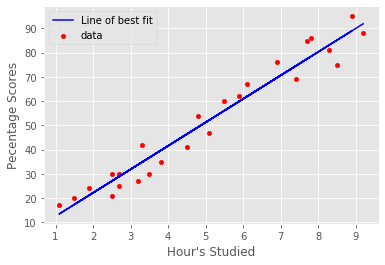

In [21]:
# Visualizing the regression line on the data
df.plot(kind = 'scatter',x ='Hours',y = 'Scores',c='r',label = 'data')
plt.plot(x_train,m*x_train+c,c='b',label = 'Line of best fit')
plt.xlabel("Hour's Studied")
plt.ylabel("Pecentage Scores")
plt.legend()
plt.show()

### Model Evaluation 

In [22]:
# using metrics to find the mean absolute error & r2 to see the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
print("Accuracy : %.2f" %r2_score(y_test,y_pred))
print('Mean Absolute Error : ',format(metrics.mean_absolute_error(y_test,y_pred)))

Accuracy : 0.97
Mean Absolute Error :  3.9207511902099244


### Predicting the Score with user input

In [23]:
hours = float(input())
own_pred = lr.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No. of Hours = 9.25
Predicted Score = 92.38611528261494


In [24]:
hours = float(input())
own_pred = lr.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

1
No. of Hours = 1.0
Predicted Score = 12.508970508355434
